# Suicide Analysis in India (2001-2012)

Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Reading and filtering data

In [11]:
df = pd.read_csv("suicides_india.csv")

df = df[df["Type"] != "Other"]
df = df[df["Type"] != "Others"]
df = df[df["Type"] != "Causes Not known"]
df = df[df["State"] != "Total (All India)"]
df = df[df["State"] != "Total (Uts)"]
df = df[df["State"] != "Total (States)"]

df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness,Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse,Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


Checking types of data recorded

In [3]:
df["Type_code"].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

### Analysis of Causes

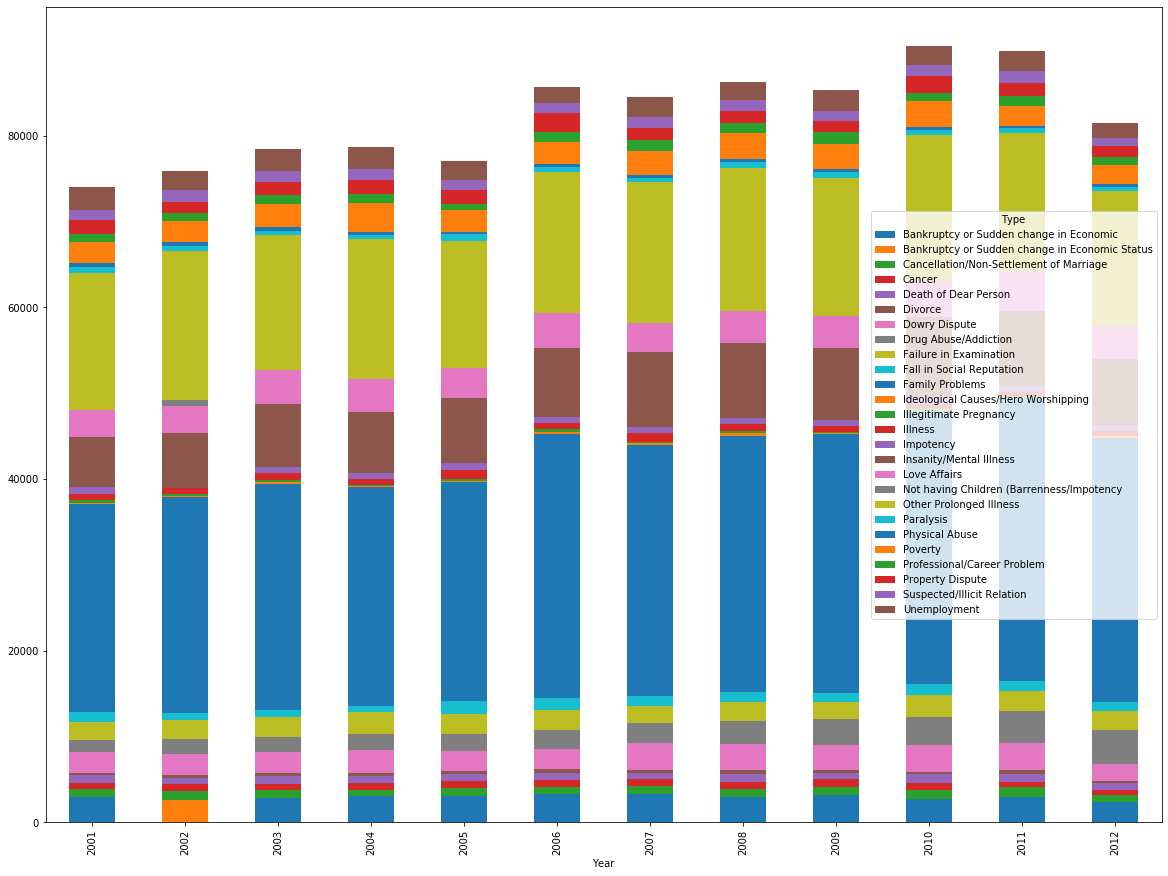

In [104]:
causes = df[df["Type_code"] == 'Causes']
causes.pivot_table(index="Year", values="Total", columns="Type", aggfunc=np.sum, fill_value=0).plot.bar(stacked=True, figsize=(20,15))

As we can see from the graph above, <b>family problem</b> was the most common cause of suicide, followed by <b>Other Prolonged Illness</b>

Now we will analyse gender

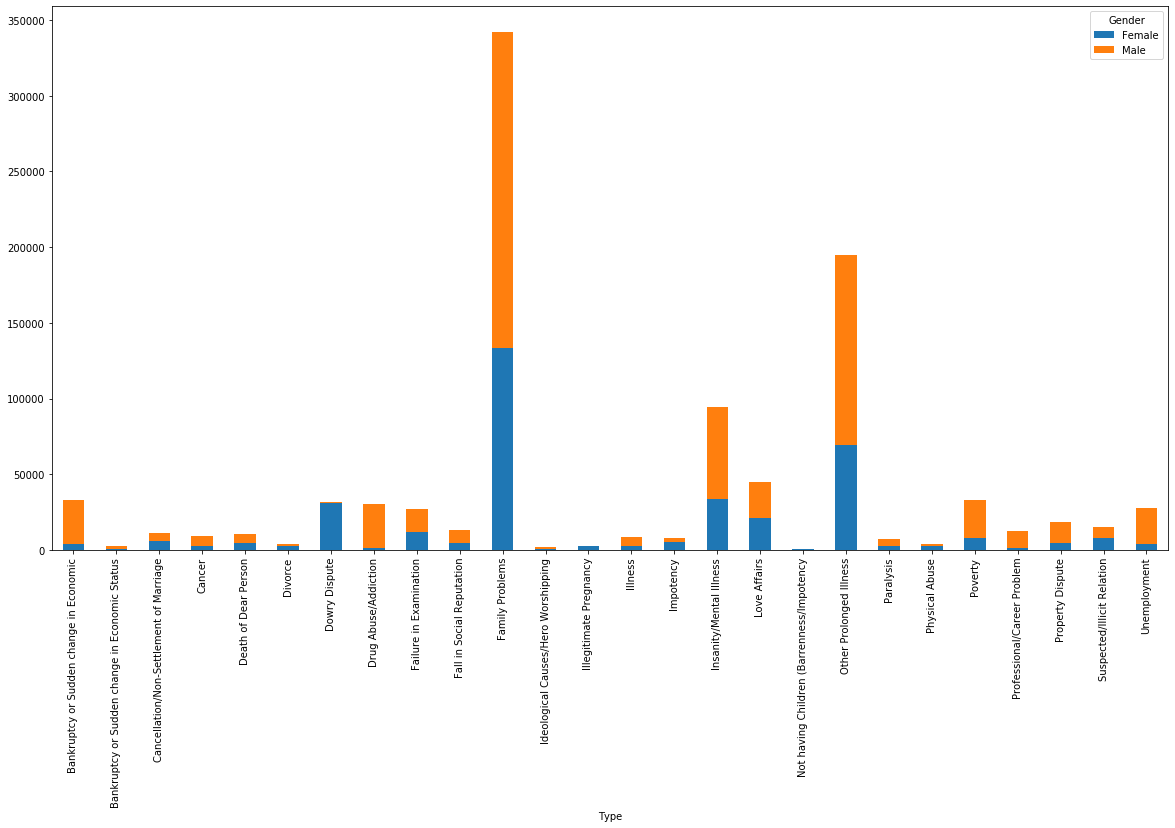

In [103]:
causes.pivot_table(index="Type", values="Total", columns="Gender", aggfunc=np.sum, fill_value=0).plot.bar(stacked=True, figsize=(20,10))

As we can see, men are more prone to suicide in most cases. However in cases like <b>cancellation of marriage, divorce, physical abuse, Suspected relation</b>, women are more likely to commit suicide

Now we analyse causes based on age group

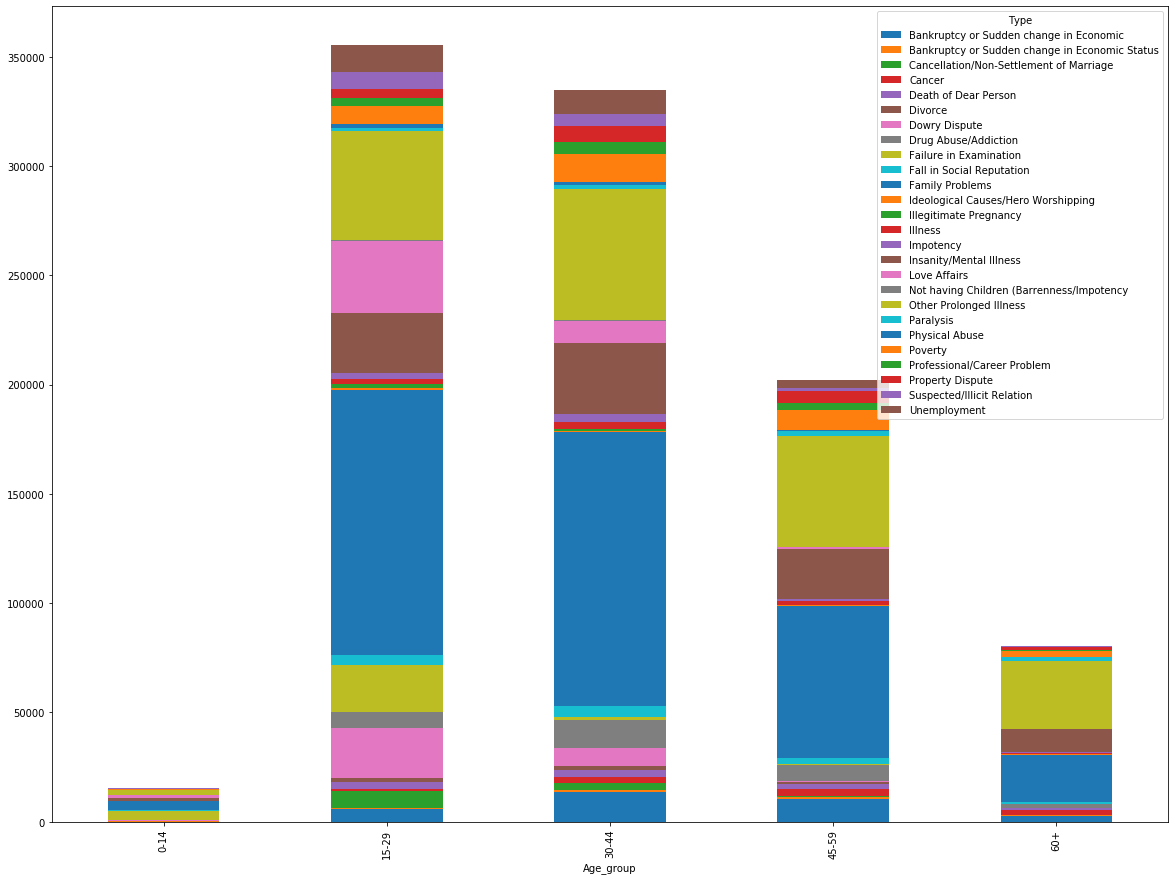

In [102]:
causes.pivot_table(index="Age_group", values="Total", columns="Type", aggfunc=np.sum, fill_value=0).plot.bar(stacked=True, figsize=(20,15))

As we can see, most suicides in the age group 15-44 with main causes Family Problems and Other Prolonged Illness.
However with passage of time, suicides due to issues like Dowry, Love Affairs etc subsided

## Analysis of Education Status

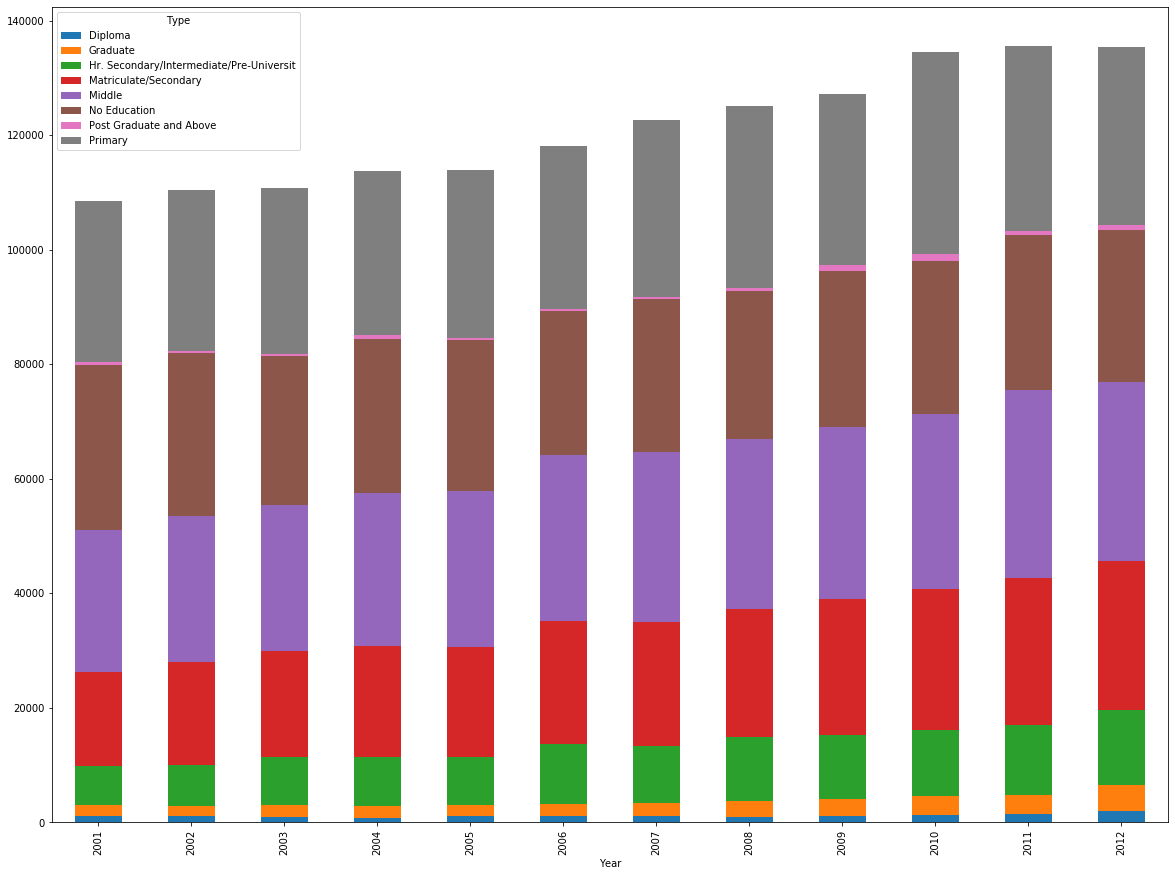

In [101]:
edu = df[df["Type_code"] == 'Education_Status']
edu.pivot_table(index="Year", values="Total", columns="Type", aggfunc=np.sum, fill_value=0).plot.bar(stacked=True, figsize=(20,15))

From the graph we can see that the suicides were mostly done by people with Primary Education, No Education, Middle level Education and Secondary Education.
People with diploma, graduation, post graduation and above had very less suicide figures.
Therefore we can conclude that <b>education lowers down sucide rate</b>

Now we analyse the genders

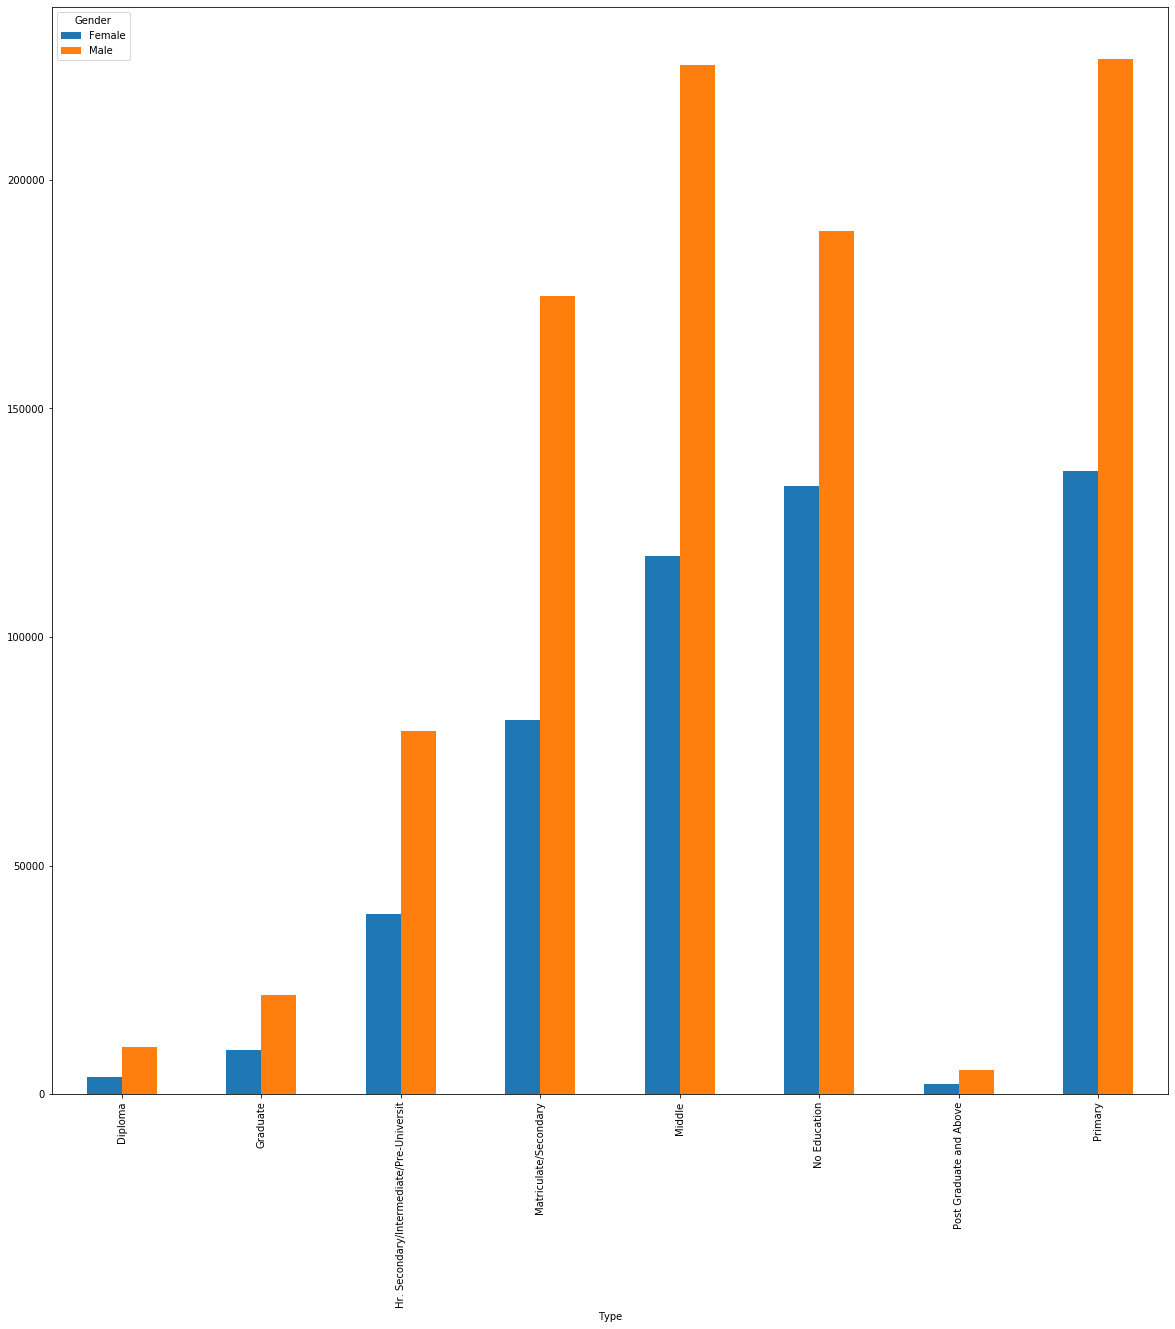

In [19]:
edu.pivot_table(index="Type", values="Total", columns="Gender", aggfunc=np.sum, fill_value=0).plot.bar(stacked=False, figsize=(20,20))

Men are more likely to commit suicide than women

## Analysis of Means Adopted 

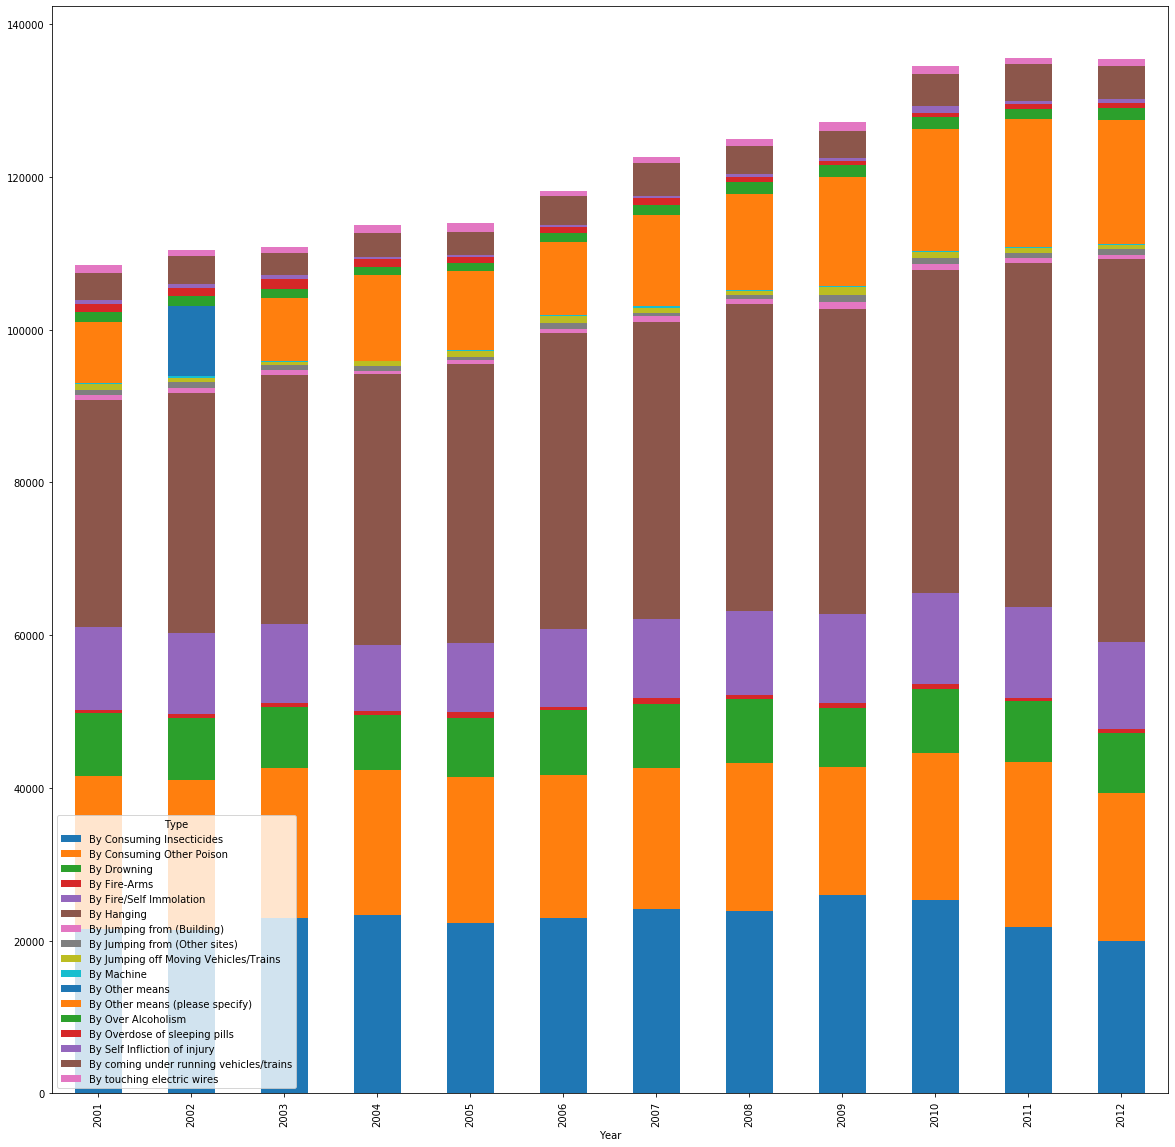

In [95]:
means = df[df["Type_code"] == "Means_adopted"]
means.pivot_table(index="Year", values="Total", columns="Type", aggfunc=np.sum, fill_value=0).plot.bar(stacked=True, figsize=(20,20))

From the graph above, we can see that most methods of suicide were consumption of insecticides or poison, hanging, fire/self immolation and drowning

Now we will analyse the methods of suicide by gender

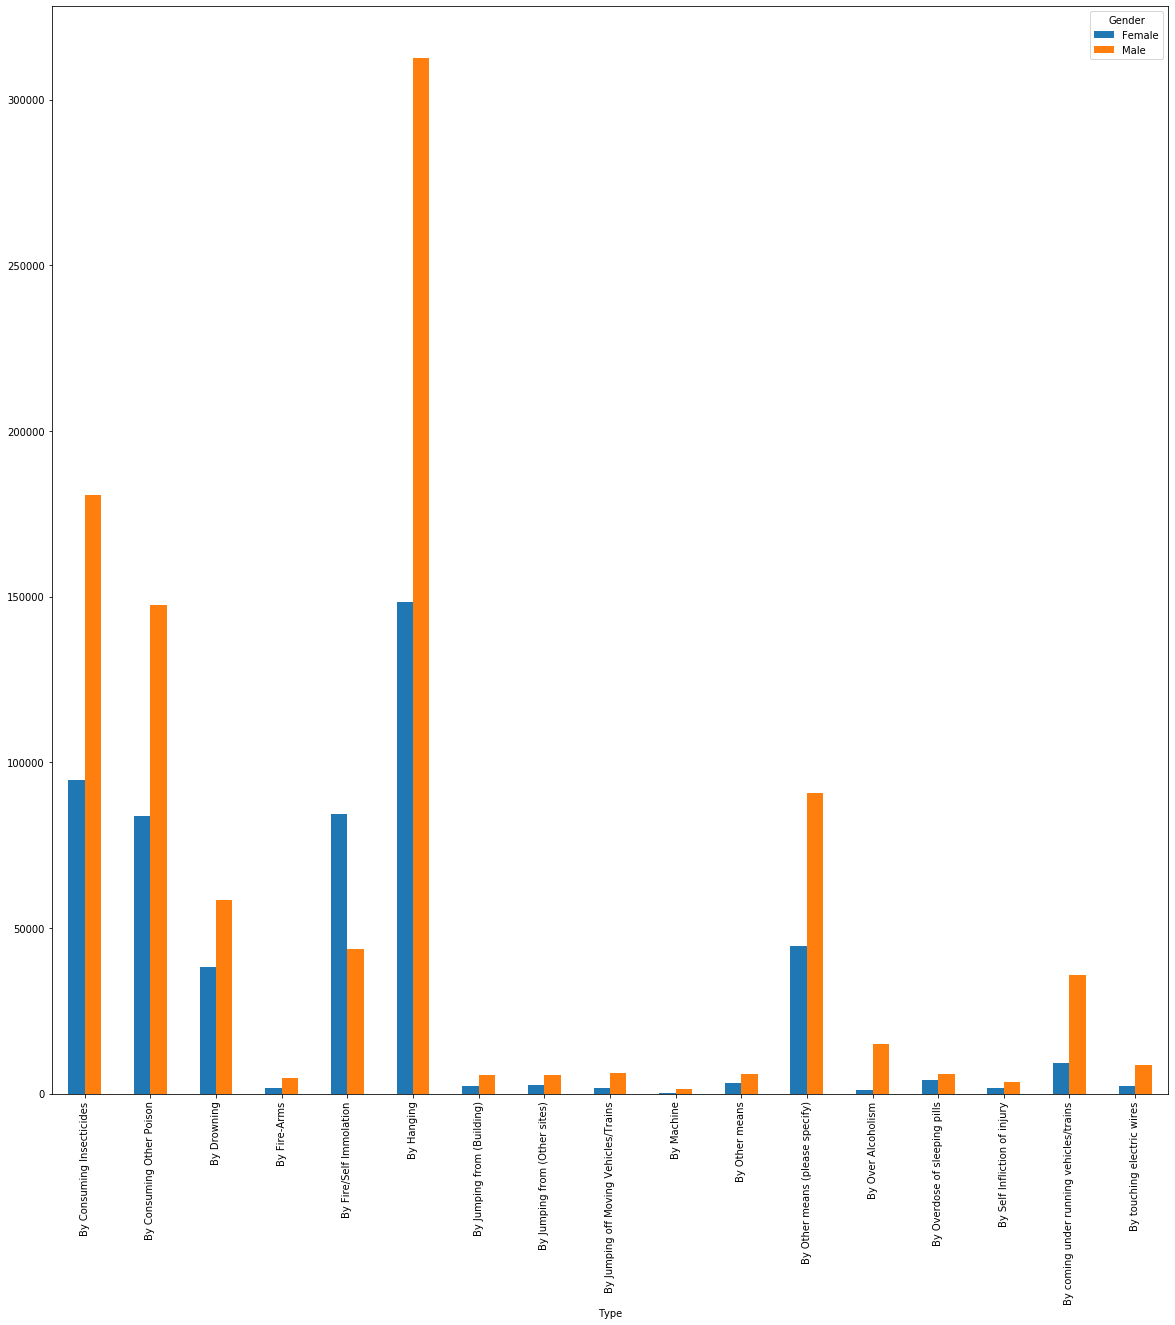

In [26]:
means.pivot_table(index="Type", values="Total", columns="Gender", aggfunc=np.sum, fill_value=0).plot.bar(stacked=False, figsize=(20,20))

We can see that women tend to use means of fire/self immolation more than men

Analysing the means adopted per age group

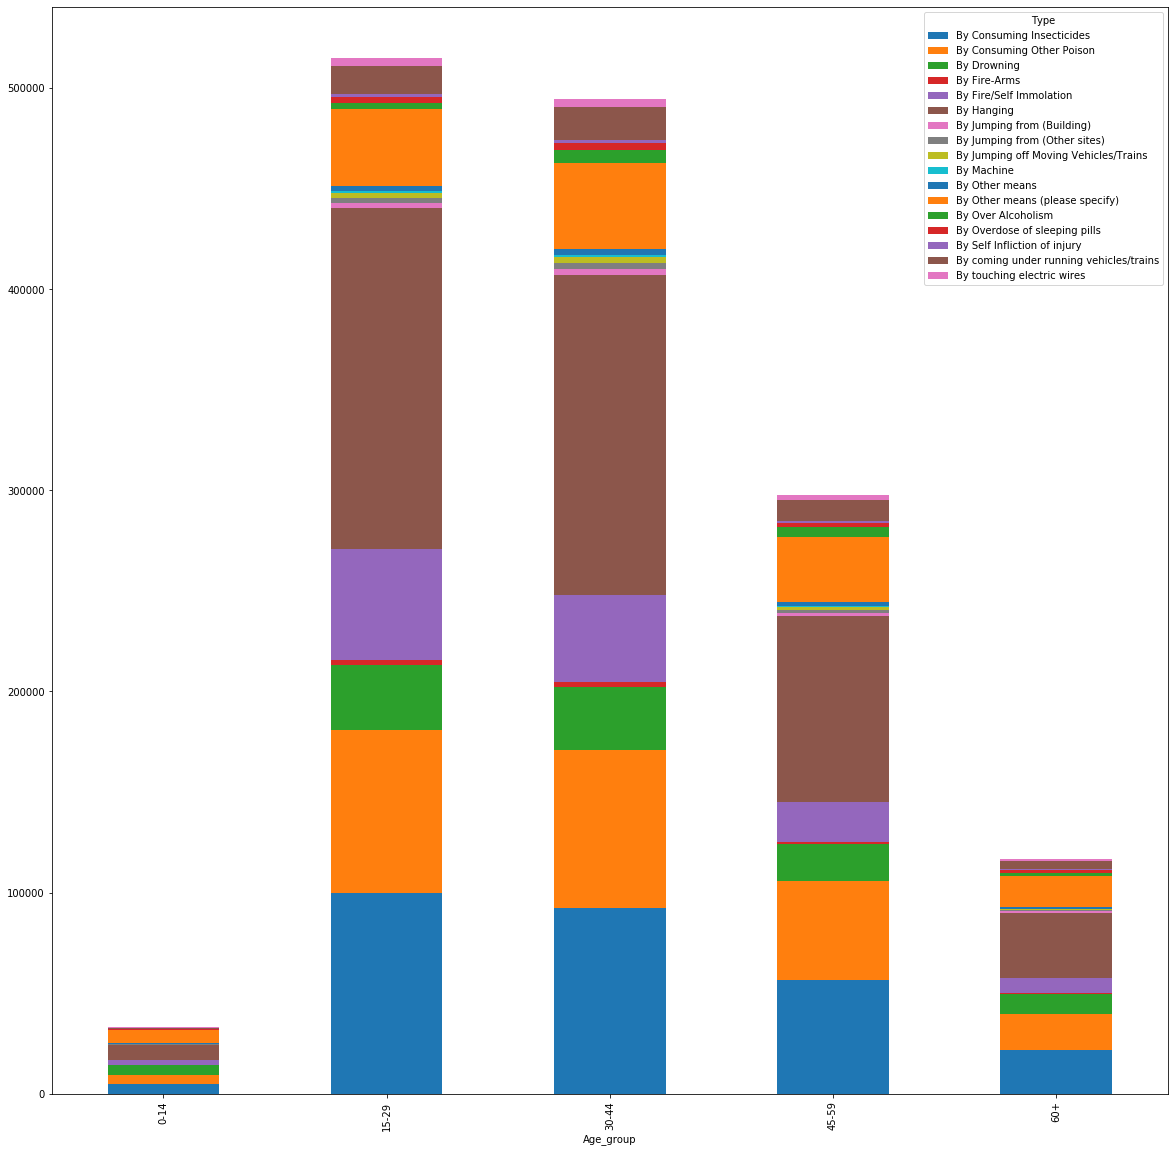

In [94]:
means.pivot_table(index="Age_group", values="Total", columns="Type", aggfunc=np.sum, fill_value=0).plot.bar(stacked=True, figsize=(20,20))

We can see that hanging is the most used means of suicide. 

## Analysis of Profession

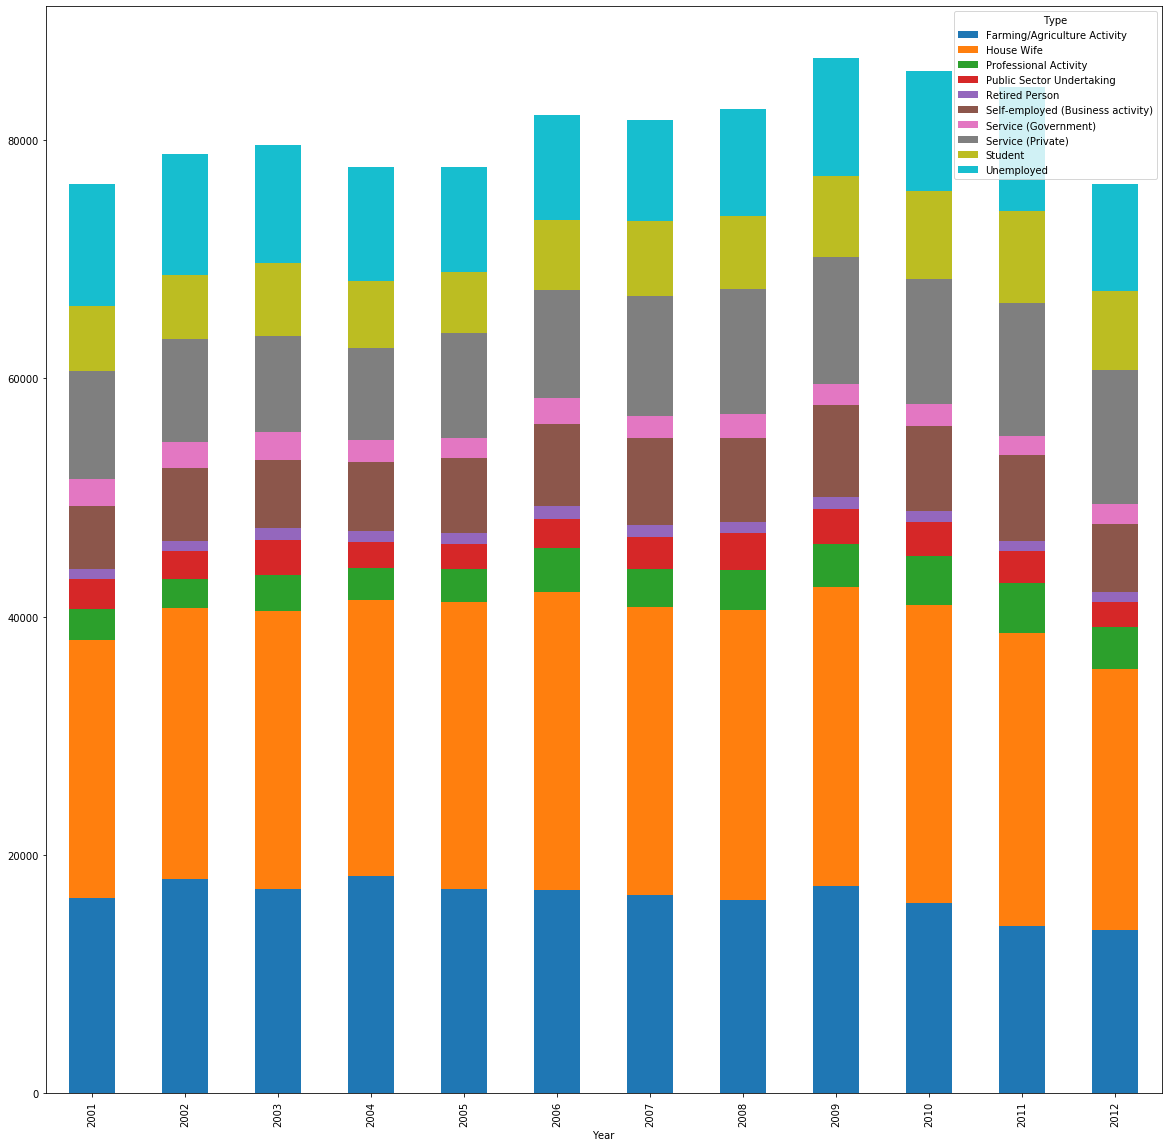

In [93]:
pro = df[df["Type_code"] == "Professional_Profile"]
pro.pivot_table(index="Year", values="Total", columns="Type", aggfunc=np.sum, fill_value=0).plot.bar(stacked=True, figsize=(20,20))

A shocking result that housewives are more likely to commit suicide can be seen from the graph. This is followed by farmers and unemployed people


Analysis for each gender

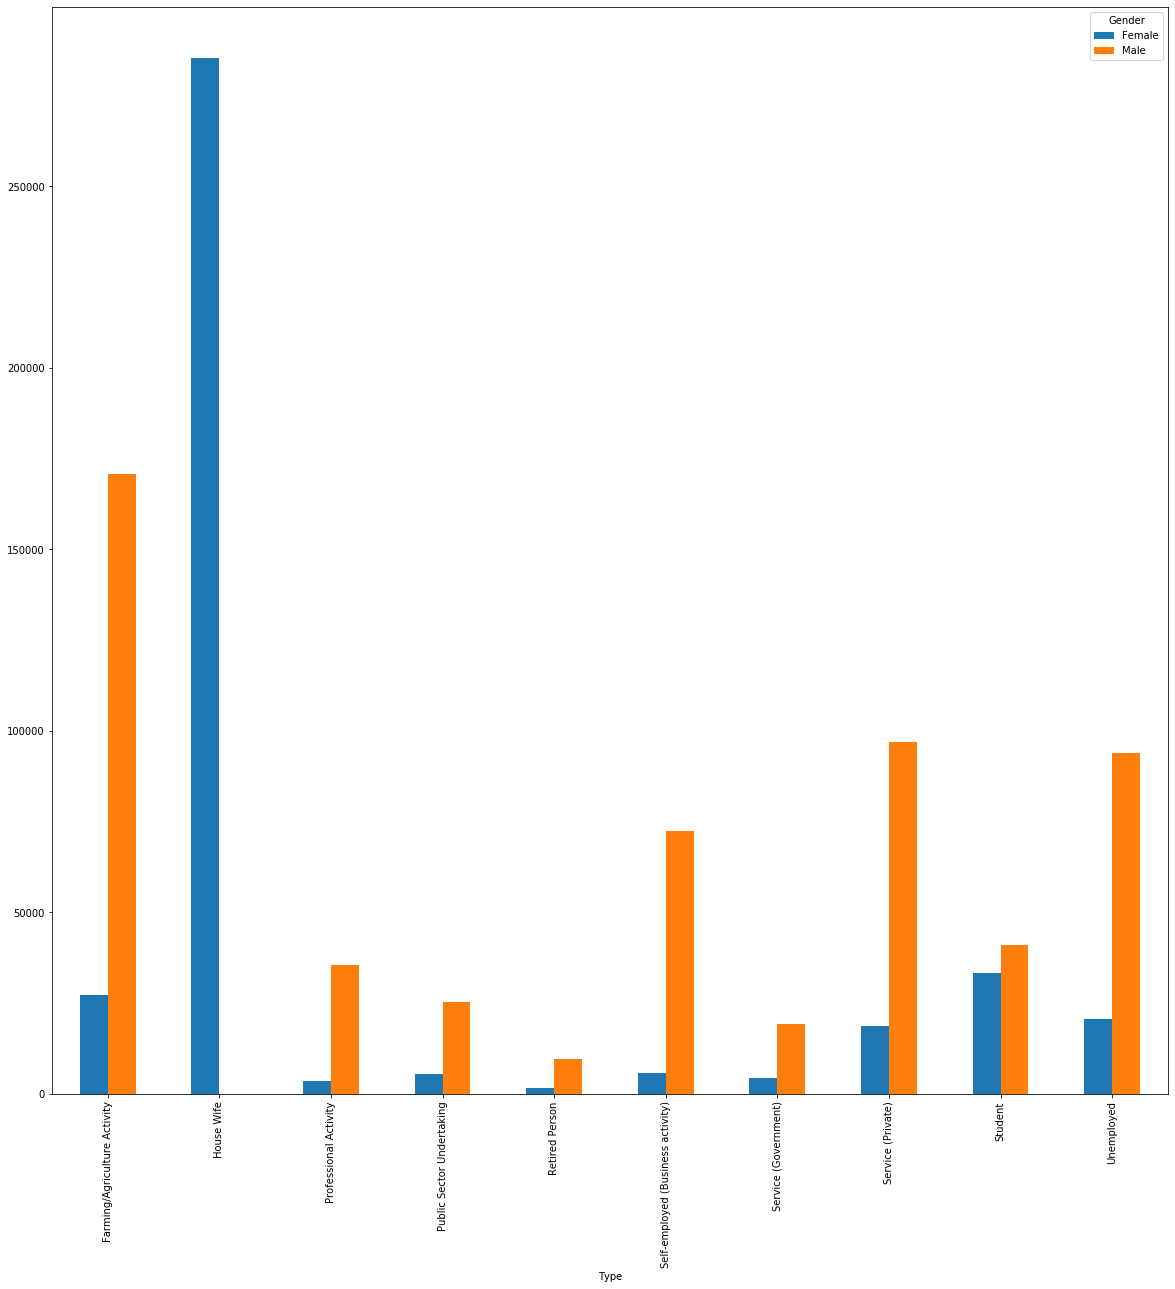

In [31]:
pro.pivot_table(index="Type", values="Total", columns="Gender", aggfunc=np.sum, fill_value=0).plot.bar(stacked=False, figsize=(20,20))

Suicide by House Wife is the most common suicide. In case of Students, there is a somewhat less probability of women to commit suicide than men. However in rest all cases, men has more probability to commit suicide

Analysis by Age Group

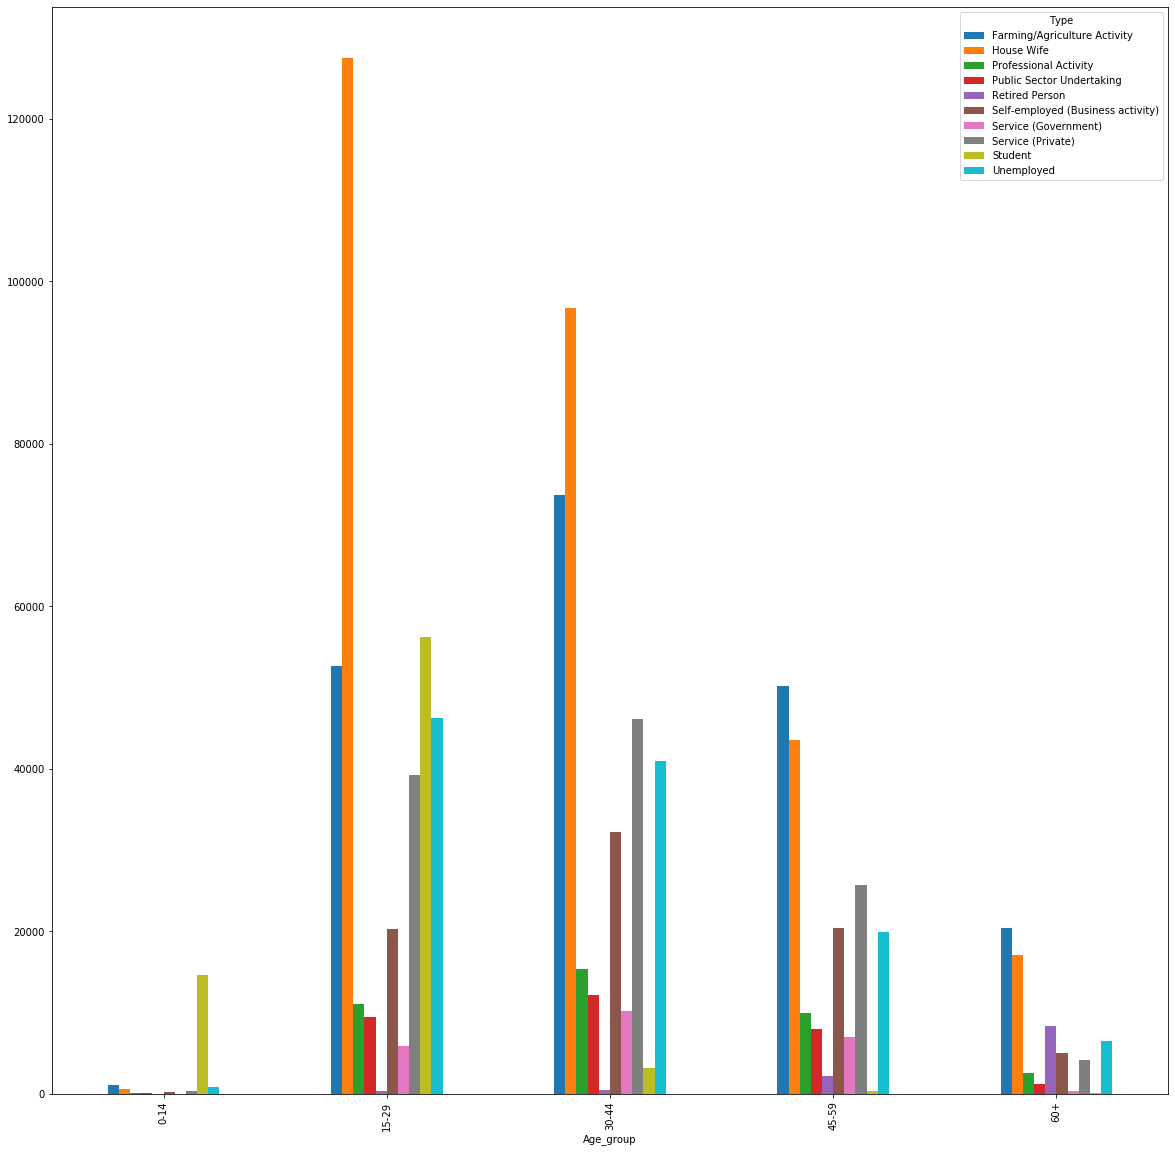

In [33]:
pro.pivot_table(index="Age_group", values="Total", columns="Type", aggfunc=np.sum, fill_value=0).plot.bar(stacked=False, figsize=(20,20))

We can see that students are more likely to commit suicide at the age group 0-14. This is due to the fact that this age group belongs to students only.

We can also see that in the age group 15-29, housewives have most probability to commit suicide. This may be due to the reason that they are newly married and could not adapt to the stress and work of newly settled life
However suicide by housewives tend to decrease as the age increases.
The student suicide rate is also the second in the age group 15-29 and decreases sharply in next age group as people may no longer be students.

In the age group 30-44 farmers are the second most people by number to commit suicide and proceeding forward, they become the most likely to commit suicide.


## Analysis of Social Status

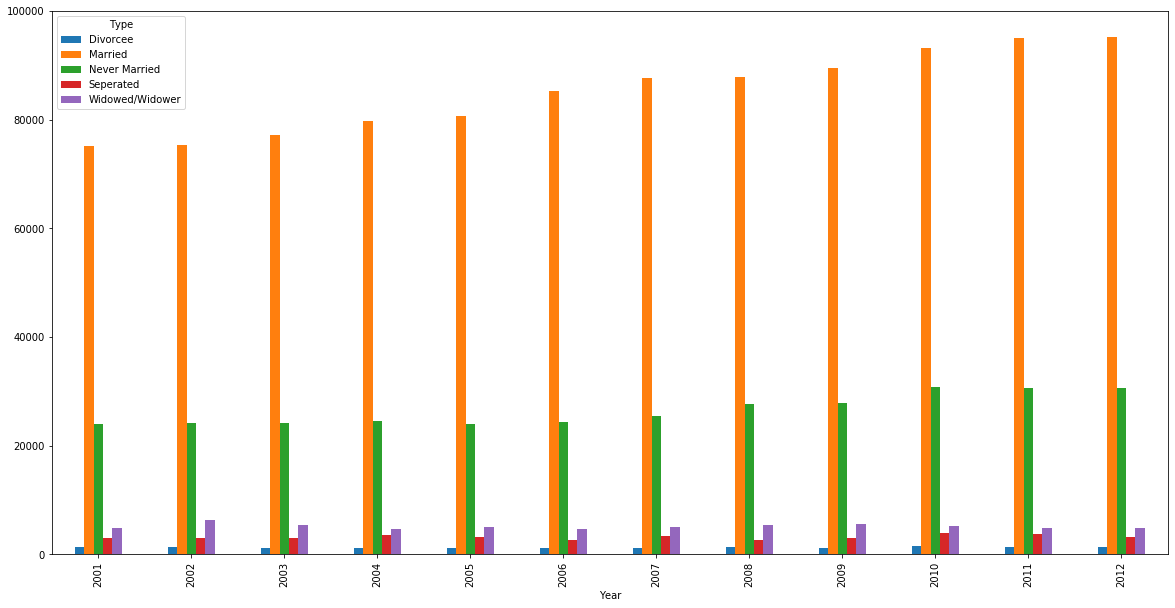

In [106]:
social = df[df["Type_code"] == "Social_Status"]
social.pivot_table(index="Year", values="Total", columns="Type", aggfunc=np.sum, fill_value=0).plot.bar(stacked=False, figsize=(20,10))

We can see that Married people are most likely to commit suicide followed by people who never married. This may be due to the fact that Housewives tend to commit most suicides as we saw previously.
Divorcee, separated and widow are very less likely to commit suicide.

Analysing by Gender

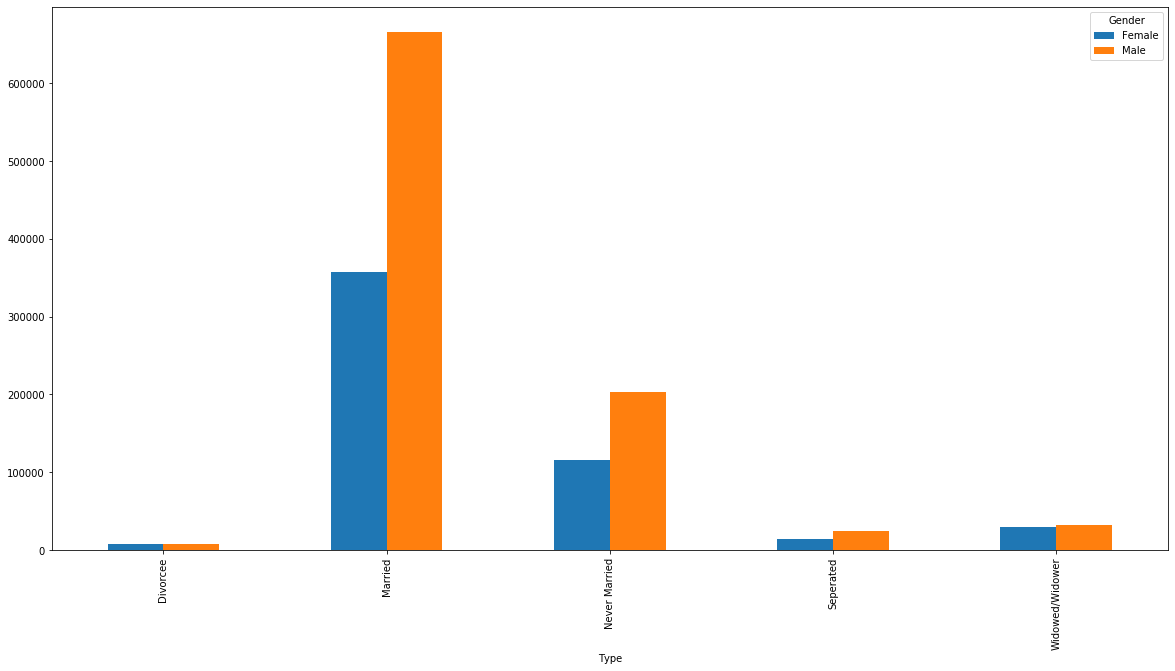

In [105]:
social.pivot_table(index="Type", values="Total", columns="Gender", aggfunc=np.sum, fill_value=0).plot.bar(stacked=False, figsize=(20,10))

In cases like Divorcee, widowed, there is an equal probability of sucide by men and women.

Rest men are more likely to commit suicide
However as househusband is not seen as a profession, hence housewife topped the previous list of suicide

## Analysis of States

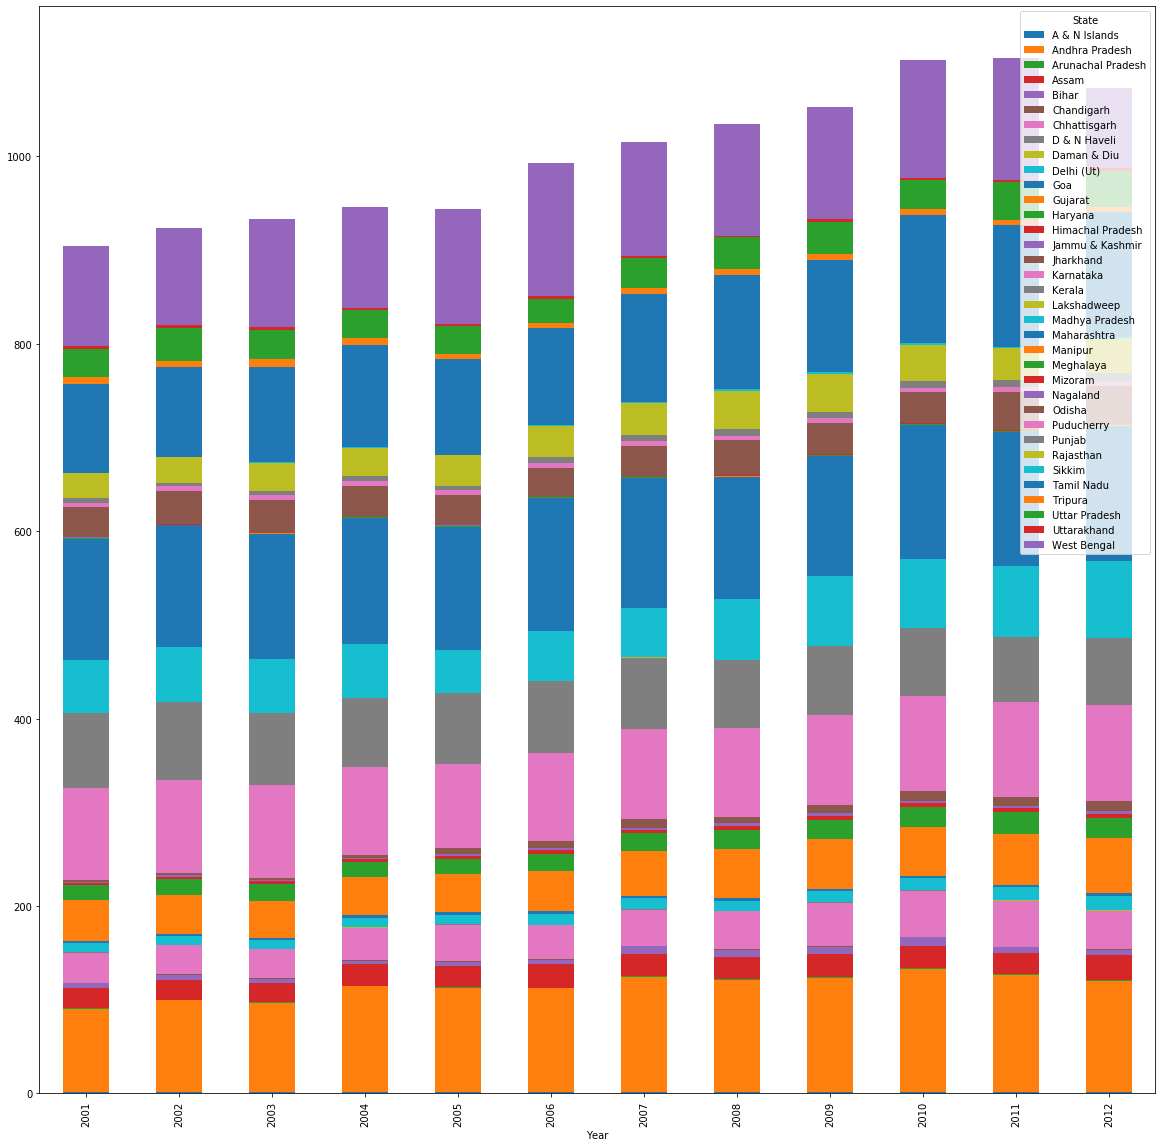

In [80]:
df.pivot_table("Total", "Year", "State").plot.bar(stacked=True, figsize=(20,20))    

As we can see above, Andhra Pradesh, Karnataka, Goa, Maharashtra, West Bengal were among the top states with high suicides recorded.
A & N Islands, Arunanchal Pradesh, Assam, Chandigarh, Puducherry, Manipur showed very less suicide rate

#### Analysing each state

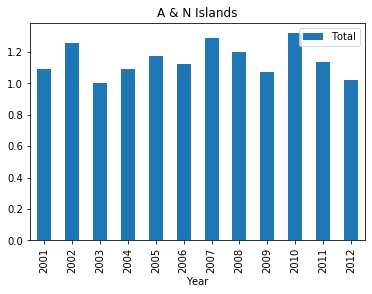

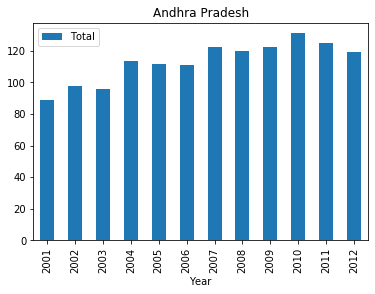

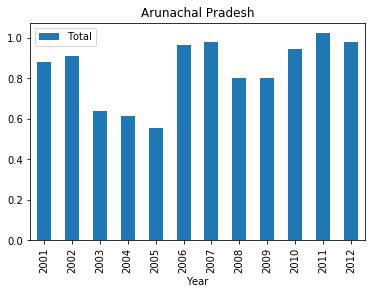

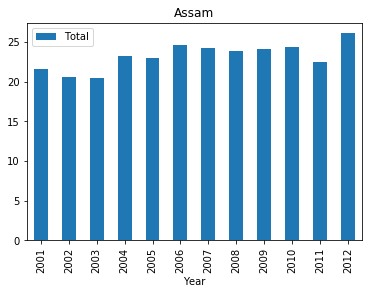

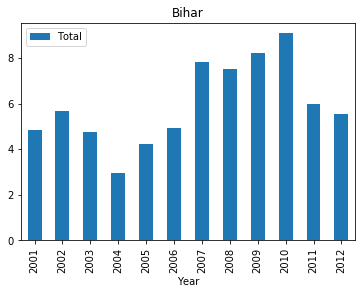

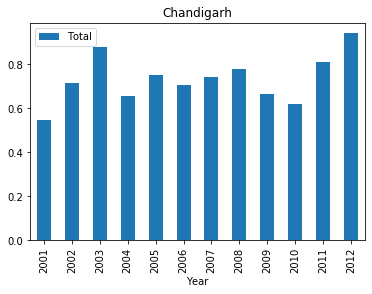

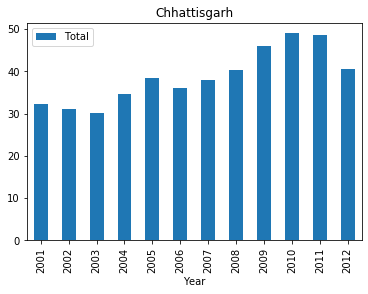

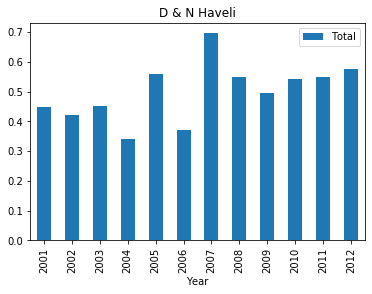

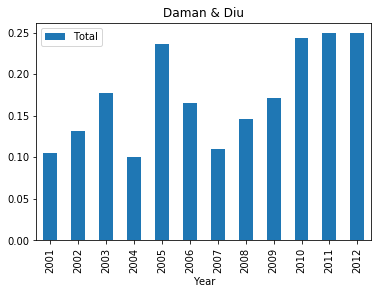

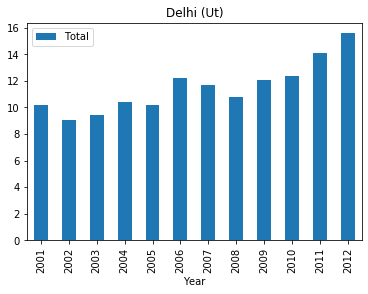

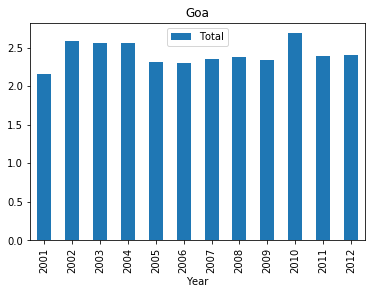

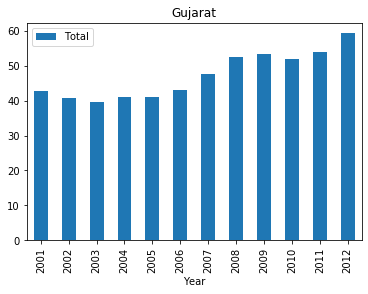

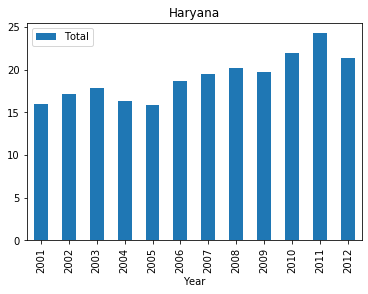

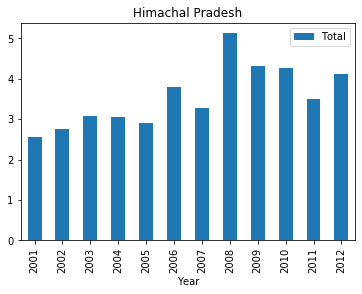

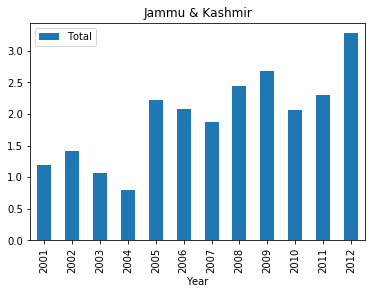

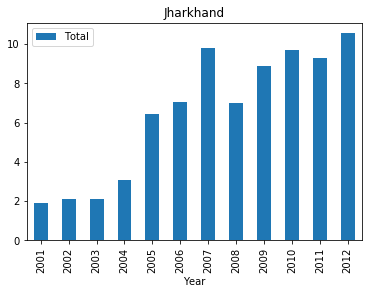

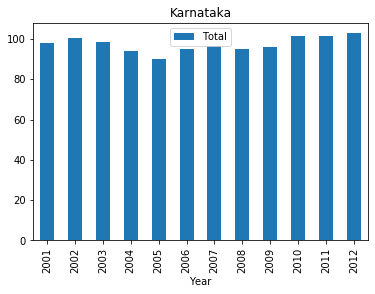

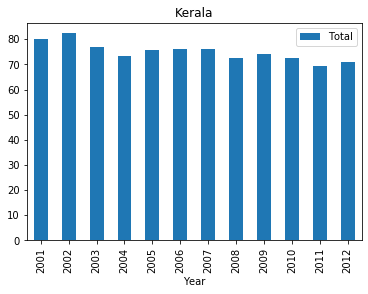

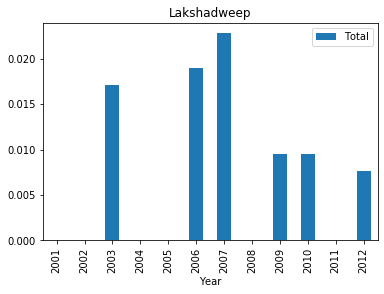

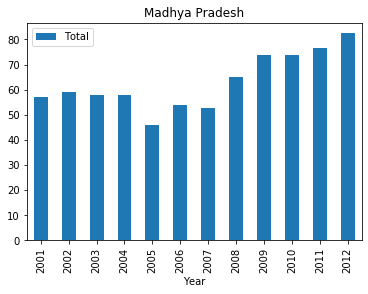

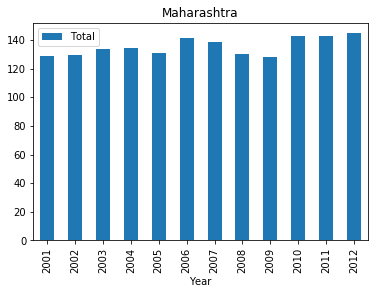

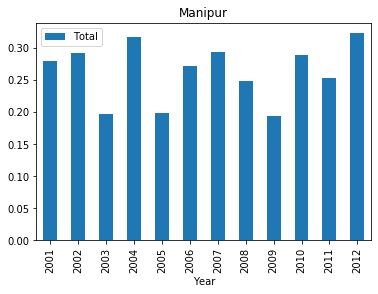

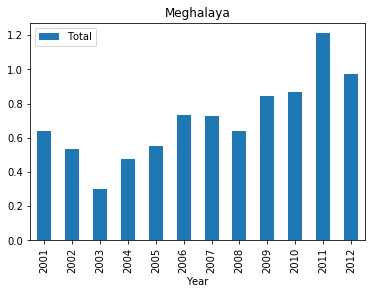

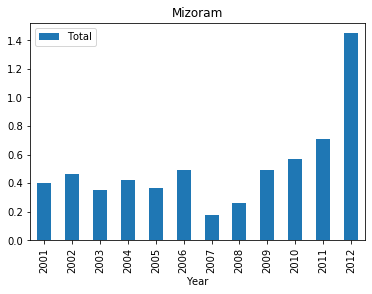

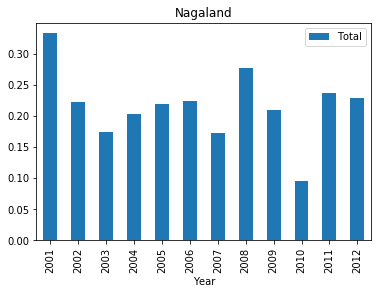

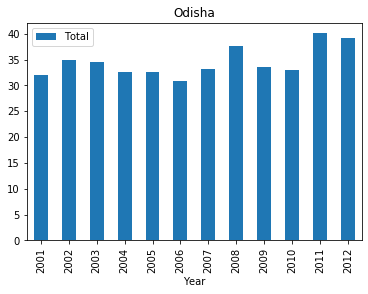

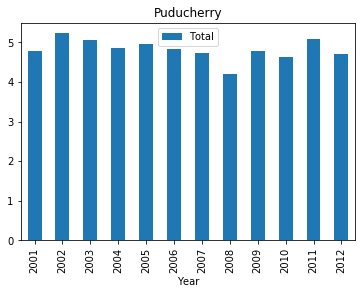

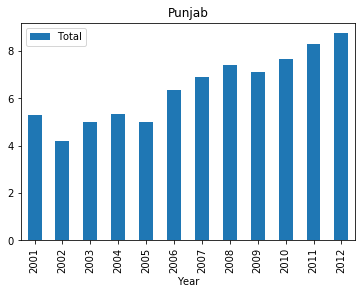

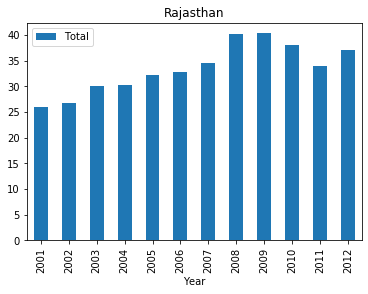

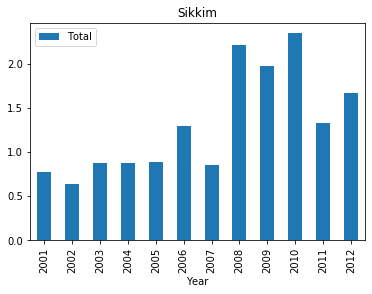

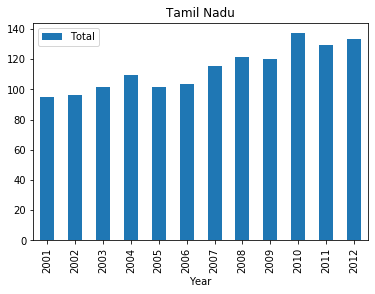

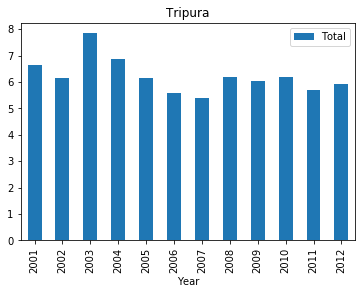

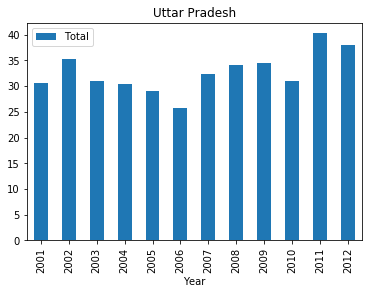

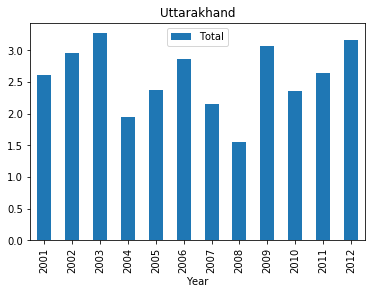

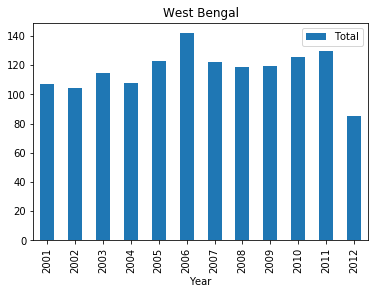

In [91]:
for state in list(df["State"].unique()):
    temp = df[df["State"] == state]
    temp.pivot_table("Total", "Year").plot.bar(stacked=True, title=state)    

We can see that suicide rates have increased in almost all the states in the recent years

## Conclusion

<b>Causes</b>: Family problem was the most common cause of suicide, followed by Other Prolonged Illness.
        In cases like cancellation of marriage, divorce, physical abuse, Suspected relation, women are more likely to
        commit suicide.
        With passage of time, suicides due to issues like Dowry, Love Affairs etc subsided.


<b>Education</b>: The suicides were mostly done by people with Primary Education, No Education, Middle level Education and Secondary Education. People with diploma, graduation, post graduation and above had very less suicide figures. Therefore we can conclude that education lowers down sucide rate

<b>Means: </b>Most methods of suicide were consumption of insecticides or poison, hanging, fire/self immolation and drowning. Women tend to use means of fire/self immolation more than men. Hanging is most common means of suicide.

<b>Profession</b>: Housewives are more likely to commit suicide can be seen from the graph. This is followed by farmers and unemployed people. In case of Students, there is a somewhat less probability of women to commit suicide than men. However in rest all cases, men has more probability to commit suicide.

<b>States: </b> Andhra Pradesh, Karnataka, Goa, Maharashtra, West Bengal were among the top states with high suicides recorded.
A & N Islands, Arunanchal Pradesh, Assam, Chandigarh, Puducherry, Manipur showed very less suicide rate